In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


In [87]:
dataframe=pd.read_csv("./collected_dataset.csv")


In [88]:
dataframe.head(2)#217

,Age,Gender,Education/Occupation (currently doing),Social media apps in which you have accounts,Apps that you are frequently using,you are using social media since,Average time you spent on social media everyday,How often do you respond to the notification of social media?,You spend a lot of time thinking about social media or planning how to use it.,You feel an urge to use social media more and more.,...,I am satisfied with work what I do.,At times I think I am no good at all.,I feel that I have a good qualities.,I am able to do things as well as most other people.,I do not feel much proud of my ability.,"Sometimes, I feel my expertise has no use.",I feel that I'm here with purpose as others.,I wish I could have more respect for myself.,I feel that I can not achieve goals(dreams) as others do.,I take a positive attitude toward myself.
0,>35,Male,Doctor,"WhatsApp, Facebook","WhatsApp, Facebook",more than 5 years,1 - 2hours,Immediately only if it's important,Very rarely,sometimes,...,Strongly agree,Strongly disagree,Strongly agree,Strongly agree,Strongly disagree,Strongly disagree,Strongly agree,Strongly disagree,Strongly disagree,Strongly agree
1,19-25,Male,Post Graduate (PG),"WhatsApp, Youtube, Instagram, Facebook, Twitte...","WhatsApp, Youtube, Instagram, Facebook",4 years,2 - 3 hours,Immediately only if it's important,often,Very rarely,...,Agree,Disagree,Agree,Strongly agree,Disagree,Agree,Agree,Agree,Strongly disagree,Agree


In [89]:
column_names = dataframe.columns.tolist()
print(column_names)

['Age', 'Gender', 'Education/Occupation (currently doing)', 'Social media apps in which you have accounts', 'Apps that you are frequently using', 'you are using social media since ', 'Average time you spent on social media everyday', 'How often do you respond to the notification of social media?', 'You spend a lot of time thinking about social media or planning how to use it.', 'You feel an urge to use social media more and more.', 'You use social media in order to forget about personal problems.', 'You have tried to cut down on the use of social media without success.', 'You become restless or troubled if you are prohibited from using social media.', 'You use social media in a way that achieving your goals/academic score becomes tough/stressful.', 'I am satisfied with work what I do.', 'At times I think I am no good at all.', ' I feel that I have a good qualities.', 'I am able to do things as well as most other people. ', 'I do not feel much proud of my ability.', 'Sometimes, I  feel 

In [90]:
dataframe=dataframe.drop(['Age', 'Gender', 'Education/Occupation (currently doing)', 'Social media apps in which you have accounts'],axis=1)

In [91]:
dataframe.head()

,Apps that you are frequently using,you are using social media since,Average time you spent on social media everyday,How often do you respond to the notification of social media?,You spend a lot of time thinking about social media or planning how to use it.,You feel an urge to use social media more and more.,You use social media in order to forget about personal problems.,You have tried to cut down on the use of social media without success.,You become restless or troubled if you are prohibited from using social media.,You use social media in a way that achieving your goals/academic score becomes tough/stressful.,I am satisfied with work what I do.,At times I think I am no good at all.,I feel that I have a good qualities.,I am able to do things as well as most other people.,I do not feel much proud of my ability.,"Sometimes, I feel my expertise has no use.",I feel that I'm here with purpose as others.,I wish I could have more respect for myself.,I feel that I can not achieve goals(dreams) as others do.,I take a positive attitude toward myself.
0,"WhatsApp, Facebook",more than 5 years,1 - 2hours,Immediately only if it's important,Very rarely,sometimes,Very rarely,Very rarely,Very rarely,Very rarely,Strongly agree,Strongly disagree,Strongly agree,Strongly agree,Strongly disagree,Strongly disagree,Strongly agree,Strongly disagree,Strongly disagree,Strongly agree
1,"WhatsApp, Youtube, Instagram, Facebook",4 years,2 - 3 hours,Immediately only if it's important,often,Very rarely,sometimes,often,often,sometimes,Agree,Disagree,Agree,Strongly agree,Disagree,Agree,Agree,Agree,Strongly disagree,Agree
2,"WhatsApp, Youtube, Instagram, Facebook, Twitte...",4 years,2 - 3 hours,Immediately only if it's important,rarely,sometimes,Very rarely,rarely,rarely,often,Agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Disagree,Disagree,Disagree,Strongly disagree,Strongly agree
3,"WhatsApp, Youtube, Instagram, Telegram, Snapchat",5 years,3 - 4 hours,I put off notifications,rarely,Very rarely,sometimes,sometimes,rarely,rarely,Agree,Agree,Strongly agree,Agree,Strongly disagree,Strongly disagree,Agree,Strongly agree,Strongly disagree,Strongly agree
4,"WhatsApp, Youtube, Instagram, Facebook, Telegram",more than 5 years,1 - 2hours,Whenever took a phone,sometimes,sometimes,often,often,rarely,sometimes,Agree,Disagree,Agree,Agree,Agree,Disagree,Agree,Agree,Disagree,Agree


In [92]:
# Sütun sayısını hesaplayalım
sutun_sayisi = dataframe.shape[1]

# Sütunların yeni isimlerini oluşturalım
yeni_sutun_isimleri = [f'Q{i}' for i in range(1, sutun_sayisi + 1)]

# Yeni sütun isimlerini DataFrame'e atayalım
dataframe.columns = yeni_sutun_isimleri

# Yeni sütun isimlerini yazdıralım
print("Yeni Sütun İsimleri:")
print(dataframe)

Yeni Sütun İsimleri:
                                                    Q1                 Q2  \
0                                   WhatsApp, Facebook  more than 5 years   
1               WhatsApp, Youtube, Instagram, Facebook            4 years   
2    WhatsApp, Youtube, Instagram, Facebook, Twitte...            4 years   
3     WhatsApp, Youtube, Instagram, Telegram, Snapchat            5 years   
4     WhatsApp, Youtube, Instagram, Facebook, Telegram  more than 5 years   
..                                                 ...                ...   
211                                           LinkedIn             1 year   
212                       WhatsApp, Youtube, Instagram            3 years   
213                                WhatsApp, Instagram            4 years   
214             WhatsApp, Youtube, Instagram, Telegram            4 years   
215                       WhatsApp, Youtube, Instagram             1 year   

              Q3                                     Q

In [93]:
dataframe.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20
0,"WhatsApp, Facebook",more than 5 years,1 - 2hours,Immediately only if it's important,Very rarely,sometimes,Very rarely,Very rarely,Very rarely,Very rarely,Strongly agree,Strongly disagree,Strongly agree,Strongly agree,Strongly disagree,Strongly disagree,Strongly agree,Strongly disagree,Strongly disagree,Strongly agree
1,"WhatsApp, Youtube, Instagram, Facebook",4 years,2 - 3 hours,Immediately only if it's important,often,Very rarely,sometimes,often,often,sometimes,Agree,Disagree,Agree,Strongly agree,Disagree,Agree,Agree,Agree,Strongly disagree,Agree
2,"WhatsApp, Youtube, Instagram, Facebook, Twitte...",4 years,2 - 3 hours,Immediately only if it's important,rarely,sometimes,Very rarely,rarely,rarely,often,Agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Disagree,Disagree,Disagree,Strongly disagree,Strongly agree
3,"WhatsApp, Youtube, Instagram, Telegram, Snapchat",5 years,3 - 4 hours,I put off notifications,rarely,Very rarely,sometimes,sometimes,rarely,rarely,Agree,Agree,Strongly agree,Agree,Strongly disagree,Strongly disagree,Agree,Strongly agree,Strongly disagree,Strongly agree
4,"WhatsApp, Youtube, Instagram, Facebook, Telegram",more than 5 years,1 - 2hours,Whenever took a phone,sometimes,sometimes,often,often,rarely,sometimes,Agree,Disagree,Agree,Agree,Agree,Disagree,Agree,Agree,Disagree,Agree


In [94]:
# Sütun tiplerini kümelendir ve listele
column_types_grouped = {}
for column_name, dtype in dataframe.dtypes.items():
    if dtype not in column_types_grouped:
        column_types_grouped[dtype] = []
    column_types_grouped[dtype].append(column_name)

# Sonuçları yazdır
for dtype, columns in column_types_grouped.items():
    print(f"Sütun Türü: {dtype}")
    print(columns)
    print()

Sütun Türü: object
['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20']



In [95]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q1      216 non-null    object
 1   Q2      216 non-null    object
 2   Q3      216 non-null    object
 3   Q4      216 non-null    object
 4   Q5      216 non-null    object
 5   Q6      216 non-null    object
 6   Q7      216 non-null    object
 7   Q8      216 non-null    object
 8   Q9      216 non-null    object
 9   Q10     216 non-null    object
 10  Q11     216 non-null    object
 11  Q12     216 non-null    object
 12  Q13     216 non-null    object
 13  Q14     216 non-null    object
 14  Q15     216 non-null    object
 15  Q16     216 non-null    object
 16  Q17     216 non-null    object
 17  Q18     216 non-null    object
 18  Q19     216 non-null    object
 19  Q20     216 non-null    object
dtypes: object(20)
memory usage: 33.9+ KB


In [96]:
# 'Q1' sütunundaki farklı cümleleri belirleme
unique_responses = dataframe['Q1'].unique()

# Farklı cümleleri listeleyerek ekrana yazdırma
print("Farklı Q1 İfadeleri:")
for response in unique_responses:
    print(response)

Farklı Q1 İfadeleri:
WhatsApp, Facebook
WhatsApp, Youtube, Instagram, Facebook
WhatsApp, Youtube, Instagram, Facebook, Twitter, Telegram, LinkedIn
WhatsApp, Youtube, Instagram, Telegram, Snapchat
WhatsApp, Youtube, Instagram, Facebook, Telegram
WhatsApp, Youtube
LinkedIn
WhatsApp, Youtube, Instagram, LinkedIn
WhatsApp, Youtube, Instagram, Facebook, LinkedIn
WhatsApp, Youtube, Facebook
WhatsApp
WhatsApp, Youtube, Twitter, 9gag
Youtube
WhatsApp, Youtube, Instagram, Facebook, Twitter, LinkedIn
WhatsApp, Youtube, Instagram
WhatsApp, Youtube, Facebook, LinkedIn
WhatsApp, Youtube, Instagram, Facebook, Twitter, Telegram
WhatsApp, Youtube, Instagram, Facebook, Telegram, LinkedIn
WhatsApp, Youtube, Instagram, Telegram
WhatsApp, Instagram
WhatsApp, Youtube, Instagram, Twitter, Telegram, LinkedIn
WhatsApp, Youtube, Telegram
WhatsApp, Youtube, Instagram, Telegram, LinkedIn
WhatsApp, Youtube, LinkedIn
WhatsApp, Youtube, Telegram, github, firefox, chrome, reddit, spotify, gmail, upwork
WhatsApp, Ins

In [97]:
#  Pointslama fonksiyonu tanımlayalım
def  Pointslama_satir(satir):
    kelimeler = satir.split(', ')  # Virgülle ayrılmış kelimeleri ayırarak bir liste oluştur
    
    kelimeler=float(len(kelimeler)*0.1)
    

    return kelimeler  # Kelime sayısını  Points olarak dön

# Her bir satır için  Pointslama yapalım
dataframe['Q1_Points'] = dataframe['Q1'].apply(Pointslama_satir)

# Sonuçları gösterelim
print(dataframe[['Q1', 'Q1_Points']])

                                                    Q1  Q1_Points
0                                   WhatsApp, Facebook        0.2
1               WhatsApp, Youtube, Instagram, Facebook        0.4
2    WhatsApp, Youtube, Instagram, Facebook, Twitte...        0.7
3     WhatsApp, Youtube, Instagram, Telegram, Snapchat        0.5
4     WhatsApp, Youtube, Instagram, Facebook, Telegram        0.5
..                                                 ...        ...
211                                           LinkedIn        0.1
212                       WhatsApp, Youtube, Instagram        0.3
213                                WhatsApp, Instagram        0.2
214             WhatsApp, Youtube, Instagram, Telegram        0.4
215                       WhatsApp, Youtube, Instagram        0.3

[216 rows x 2 columns]


In [98]:
# 'Q2' sütunundaki farklı cümleleri belirleme
unique_responses = dataframe['Q2'].unique()

# Farklı cümleleri listeleyerek ekrana yazdırma
print("Farklı Q2 İfadeleri:")
for response in unique_responses:
    print(response)

Farklı Q2 İfadeleri:
more than 5 years
4 years
5 years
3 years
2 years
1 year
less than a year


In [99]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Q1         216 non-null    object 
 1   Q2         216 non-null    object 
 2   Q3         216 non-null    object 
 3   Q4         216 non-null    object 
 4   Q5         216 non-null    object 
 5   Q6         216 non-null    object 
 6   Q7         216 non-null    object 
 7   Q8         216 non-null    object 
 8   Q9         216 non-null    object 
 9   Q10        216 non-null    object 
 10  Q11        216 non-null    object 
 11  Q12        216 non-null    object 
 12  Q13        216 non-null    object 
 13  Q14        216 non-null    object 
 14  Q15        216 non-null    object 
 15  Q16        216 non-null    object 
 16  Q17        216 non-null    object 
 17  Q18        216 non-null    object 
 18  Q19        216 non-null    object 
 19  Q20        216 non-null    object 
 20  Q1_Points 

In [100]:
def  Pointslama_q2(cumle):
    if cumle == 'less than a year':
        return 0
    elif cumle == '1 year':
        return 0.2
    elif cumle == '2 years':
        return 0.4
    elif cumle == '3 years':
        return 0.6
    elif cumle == '4 years':
        return 0.8
    elif cumle == '5 years':
        return 0.9
    elif cumle == 'more than 5 years':
        return 1
    else:
        return None

# Her bir satır için  Pointslama yapalım
dataframe['Q2_Points'] = dataframe['Q2'].apply( Pointslama_q2)

# Sonuçları gösterelim
print(dataframe)

                                                    Q1                 Q2  \
0                                   WhatsApp, Facebook  more than 5 years   
1               WhatsApp, Youtube, Instagram, Facebook            4 years   
2    WhatsApp, Youtube, Instagram, Facebook, Twitte...            4 years   
3     WhatsApp, Youtube, Instagram, Telegram, Snapchat            5 years   
4     WhatsApp, Youtube, Instagram, Facebook, Telegram  more than 5 years   
..                                                 ...                ...   
211                                           LinkedIn             1 year   
212                       WhatsApp, Youtube, Instagram            3 years   
213                                WhatsApp, Instagram            4 years   
214             WhatsApp, Youtube, Instagram, Telegram            4 years   
215                       WhatsApp, Youtube, Instagram             1 year   

              Q3                                     Q4           Q5  \
0  

In [101]:
# 'Q3' sütunundaki farklı cümleleri belirleme
unique_responses = dataframe['Q3'].unique()

# Farklı cümleleri listeleyerek ekrana yazdırma
print("Farklı Q3 İfadeleri:")
for response in unique_responses:
    print(response)

Farklı Q3 İfadeleri:
1 - 2hours
2 - 3 hours
3 - 4 hours
less than a hour
> 4 hours


In [102]:
import pandas as pd

#  Pointslama fonksiyonunu tanımlayalım
def  Pointslama_q3(cumle):
    if cumle == 'less than a hour':
        return 0
    elif cumle == '1 - 2hours':
        return 0.25
    elif cumle == '2 - 3 hours':
        return 0.5
    elif cumle == '3 - 4 hours':
        return 0.75
    elif cumle == '> 4 hours':
        return 1
    else:
        return None

# Her bir satır için  Pointslama yapalım
dataframe['Q3_Points'] = dataframe['Q3'].apply( Pointslama_q3)



In [103]:
# 'Q4' sütunundaki farklı cümleleri belirleme
unique_responses = dataframe['Q4'].unique()

# Farklı cümleleri listeleyerek ekrana yazdırma
print("Farklı Q4 İfadeleri:")
for response in unique_responses:
    print(response)

Farklı Q4 İfadeleri:
Immediately only if it's important
I put off notifications
Whenever took a phone
I Don't respond if it's not important
Immediately
As soon as possible


In [104]:
import pandas as pd



#  Pointslama fonksiyonunu tanımlayalım
def  Pointslama_q4(cumle):
    if cumle == "As soon as possible":
        return 1
    elif cumle == "Immediately":
        return 0.8
    elif cumle == "Immediately only if it's important":
        return 0.6
    elif cumle == "Whenever took a phone":
        return 0.4
    elif cumle == "I put off notifications":
        return 0.2
    elif cumle == "I Don't respond if it's not important":
        return 0
    else:
        return None

# Her bir satır için  Pointslama yapalım
dataframe['Q4_Points'] = dataframe['Q4'].apply( Pointslama_q4)




In [105]:
# 'Q5' sütunundaki farklı cümleleri belirleme
unique_responses = dataframe['Q5'].unique()

# Farklı cümleleri listeleyerek ekrana yazdırma
print("Farklı Q5 İfadeleri:")
for response in unique_responses:
    print(response)

Farklı Q5 İfadeleri:
Very rarely
often
rarely
sometimes
Very often


In [106]:
import pandas as pd



#  Pointslama fonksiyonunu tanımlayalım
def  Pointslama_q5(cumle):
    if cumle == "Very rarely":
        return 0
    elif cumle == "rarely":
        return 0.25
    elif cumle == "sometimes":
        return 0.5
    elif cumle == "often":
        return 0.75
    elif cumle == "Very often":
        return 1
    else:
        return None

# Her bir satır için  Pointslama yapalım
dataframe['Q5_Points'] = dataframe['Q5'].apply( Pointslama_q5)





In [107]:
# 'Q6' sütunundaki farklı cümleleri belirleme
unique_responses = dataframe['Q6'].unique()

# Farklı cümleleri listeleyerek ekrana yazdırma
print("Farklı Q6 İfadeleri:")
for response in unique_responses:
    print(response)

Farklı Q6 İfadeleri:
sometimes
Very rarely
rarely
often
Very often


In [108]:
import pandas as pd



#  Pointslama fonksiyonunu tanımlayalım
def  Pointslama_q6(cumle):
    if cumle == "Very rarely":
        return 0
    elif cumle == "rarely":
        return 0.25
    elif cumle == "sometimes":
        return 0.5
    elif cumle == "often":
        return 0.75
    elif cumle == "Very often":
        return 1
    else:
        return None

# Her bir satır için  Pointslama yapalım
dataframe['Q6_Points'] = dataframe['Q6'].apply( Pointslama_q5)




In [109]:
# 'Q7' sütunundaki farklı cümleleri belirleme
unique_responses = dataframe['Q7'].unique()

# Farklı cümleleri listeleyerek ekrana yazdırma
print("Farklı Q7 İfadeleri:")
for response in unique_responses:
    print(response)

Farklı Q7 İfadeleri:
Very rarely
sometimes
often
rarely
Very often


In [110]:

#  Pointslama fonksiyonunu tanımlayalım
def  Pointslama_q7(cumle):
    if cumle == "Very rarely":
        return 0
    elif cumle == "rarely":
        return 0.25
    elif cumle == "sometimes":
        return 0.5
    elif cumle == "often":
        return 0.75
    elif cumle == "Very often":
        return 1
    else:
        return None

# Her bir satır için  Pointslama yapalım
dataframe['Q7_Points'] = dataframe['Q7'].apply( Pointslama_q5)



In [111]:
# 'Q8' sütunundaki farklı cümleleri belirleme
unique_responses = dataframe['Q8'].unique()

# Farklı cümleleri listeleyerek ekrana yazdırma
print("Farklı Q8 İfadeleri:")
for response in unique_responses:
    print(response)

Farklı Q8 İfadeleri:
Very rarely
often
rarely
sometimes
Very often


In [112]:
import pandas as pd



#  Pointslama fonksiyonunu tanımlayalım
def  Pointslama_q8(cumle):
    if cumle == "Very rarely":
        return 0
    elif cumle == "rarely":
        return 0.25
    elif cumle == "sometimes":
        return 0.5
    elif cumle == "often":
        return 0.75
    elif cumle == "Very often":
        return 1
    else:
        return None

# Her bir satır için  Pointslama yapalım
dataframe['Q8_Points'] = dataframe['Q8'].apply( Pointslama_q5)



In [113]:
# 'Q9' sütunundaki farklı cümleleri belirleme
unique_responses = dataframe['Q9'].unique()

# Farklı cümleleri listeleyerek ekrana yazdırma
print("Farklı Q9 İfadeleri:")
for response in unique_responses:
    print(response)

Farklı Q9 İfadeleri:
Very rarely
often
rarely
sometimes
Very often


In [114]:
#  Pointslama fonksiyonunu tanımlayalım
def  Pointslama_q9(cumle):
    if cumle == "Very rarely":
        return 0
    elif cumle == "rarely":
        return 0.25
    elif cumle == "sometimes":
        return 0.5
    elif cumle == "often":
        return 0.75
    elif cumle == "Very often":
        return 1
    else:
        return None

# Her bir satır için  Pointslama yapalım
dataframe['Q9_Points'] = dataframe['Q9'].apply( Pointslama_q5)



In [115]:
# 'Q10' sütunundaki farklı cümleleri belirleme
unique_responses = dataframe['Q10'].unique()

# Farklı cümleleri listeleyerek ekrana yazdırma
print("Farklı Q10 İfadeleri:")
for response in unique_responses:
    print(response)

Farklı Q10 İfadeleri:
Very rarely
sometimes
often
rarely
Very often


In [116]:


#  Pointslama fonksiyonunu tanımlayalım
def  Pointslama_q10(cumle):
    if cumle == "Very rarely":
        return 0
    elif cumle == "rarely":
        return 0.25
    elif cumle == "sometimes":
        return 0.5
    elif cumle == "often":
        return 0.75
    elif cumle == "Very often":
        return 1
    else:
        return None

# Her bir satır için  Pointslama yapalım
dataframe['Q10_Points'] = dataframe['Q10'].apply( Pointslama_q5)



In [117]:
# 'Q11' sütunundaki farklı cümleleri belirleme
unique_responses = dataframe['Q11'].unique()

# Farklı cümleleri listeleyerek ekrana yazdırma
print("Farklı Q11 İfadeleri:")
for response in unique_responses:
    print(response)

Farklı Q11 İfadeleri:
Strongly agree
Agree
Strongly disagree
Disagree


In [118]:


#  Pointslama fonksiyonunu tanımlayalım
def  Pointslama_q11(cumle):
    if cumle == "Strongly agree":
        return 1
    elif cumle == "Agree":
        return 0.75
    elif cumle == "Disagree":
        return 0.50
    elif cumle == "Strongly disagree":
        return 0.25
    else:
        return None

# Her bir satır için  Pointslama yapalım
dataframe['Q11_Points'] = dataframe['Q11'].apply( Pointslama_q11)



In [119]:
# 'Q12' sütunundaki farklı cümleleri belirleme
unique_responses = dataframe['Q12'].unique()

# Farklı cümleleri listeleyerek ekrana yazdırma
print("Farklı Q12 İfadeleri:")
for response in unique_responses:
    print(response)

Farklı Q12 İfadeleri:
Strongly disagree
Disagree
Agree
Strongly agree


In [120]:


# Ters  Pointslama fonksiyonunu tanımlayalım
def ters_Pointslama_q12(cumle):
    if cumle == "Strongly agree":
        return 0.25
    elif cumle == "Agree":
        return 0.50
    elif cumle == "Disagree":
        return 0.75
    elif cumle == "Strongly disagree":
        return 1
    else:
        return None

# Her bir satır için ters  Pointslama yapalım
dataframe['Q12_Points'] = dataframe['Q12'].apply(ters_Pointslama_q12)




In [121]:
# 'Q13' sütunundaki farklı cümleleri belirleme
unique_responses = dataframe['Q13'].unique()

# Farklı cümleleri listeleyerek ekrana yazdırma
print("Farklı Q13 İfadeleri:")
for response in unique_responses:
    print(response)

Farklı Q13 İfadeleri:
Strongly agree
Agree
Disagree
Strongly disagree


In [122]:

#  Pointslama fonksiyonunu tanımlayalım
def  Pointslama_q13(cumle):
    if cumle == "Strongly agree":
        return 1
    elif cumle == "Agree":
        return 0.75
    elif cumle == "Disagree":
        return 0.50
    elif cumle == "Strongly disagree":
        return 0.25
    else:
        return None

# Her bir satır için  Pointslama yapalım
dataframe['Q13_Points'] = dataframe['Q13'].apply( Pointslama_q13)




In [123]:
# 'Q14' sütunundaki farklı cümleleri belirleme
unique_responses = dataframe['Q14'].unique()

# Farklı cümleleri listeleyerek ekrana yazdırma
print("Farklı Q14 İfadeleri:")
for response in unique_responses:
    print(response)

Farklı Q14 İfadeleri:
Strongly agree
Agree
Disagree
Strongly disagree


In [124]:


#  Pointslama fonksiyonunu tanımlayalım
def  Pointslama_q14(cumle):
    if cumle == "Strongly agree":
        return 1
    elif cumle == "Agree":
        return 0.75
    elif cumle == "Disagree":
        return 0.50
    elif cumle == "Strongly disagree":
        return 0.25
    else:
        return None

# Her bir satır için  Pointslama yapalım
dataframe['Q14_Points'] = dataframe['Q14'].apply( Pointslama_q14)




In [125]:
# 'Q15' sütunundaki farklı cümleleri belirleme
unique_responses = dataframe['Q15'].unique()

# Farklı cümleleri listeleyerek ekrana yazdırma
print("Farklı Q15 İfadeleri:")
for response in unique_responses:
    print(response)

Farklı Q15 İfadeleri:
Strongly disagree
Disagree
Agree
Strongly agree


In [126]:


# Ters  Pointslama fonksiyonunu tanımlayalım
def ters_Pointslama_q15(cumle):
    if cumle == "Strongly agree":
        return 0.25
    elif cumle == "Agree":
        return 0.50
    elif cumle == "Disagree":
        return 0.75
    elif cumle == "Strongly disagree":
        return 1
    else:
        return None

# Her bir satır için ters  Pointslama yapalım
dataframe['Q15_Points'] = dataframe['Q15'].apply(ters_Pointslama_q15)




In [127]:
# 'Q16' sütunundaki farklı cümleleri belirleme
unique_responses = dataframe['Q16'].unique()

# Farklı cümleleri listeleyerek ekrana yazdırma
print("Farklı Q16 İfadeleri:")
for response in unique_responses:
    print(response)

Farklı Q16 İfadeleri:
Strongly disagree
Agree
Disagree
Strongly agree


In [128]:


# Ters  Pointslama fonksiyonunu tanımlayalım
def ters_Pointslama_q16(cumle):
    if cumle == "Strongly agree":
        return 0.25
    elif cumle == "Agree":
        return 0.50
    elif cumle == "Disagree":
        return 0.75
    elif cumle == "Strongly disagree":
        return 1
    else:
        return None

# Her bir satır için ters  Pointslama yapalım
dataframe['Q16_Points'] = dataframe['Q16'].apply(ters_Pointslama_q16)




In [129]:
# 'Q17' sütunundaki farklı cümleleri belirleme
unique_responses = dataframe['Q17'].unique()

# Farklı cümleleri listeleyerek ekrana yazdırma
print("Farklı Q17 İfadeleri:")
for response in unique_responses:
    print(response)

Farklı Q17 İfadeleri:
Strongly agree
Agree
Disagree
Strongly disagree


In [130]:


#  Pointslama fonksiyonunu tanımlayalım
def  Pointslama_q17(cumle):
    if cumle == "Strongly agree":
        return 1
    elif cumle == "Agree":
        return 0.75
    elif cumle == "Disagree":
        return 0.50
    elif cumle == "Strongly disagree":
        return 0.25
    else:
        return None

# Her bir satır için  Pointslama yapalım
dataframe['Q17_Points'] = dataframe['Q17'].apply( Pointslama_q17)




In [131]:
# 'Q18' sütunundaki farklı cümleleri belirleme
unique_responses = dataframe['Q18'].unique()

# Farklı cümleleri listeleyerek ekrana yazdırma
print("Farklı Q18 İfadeleri:")
for response in unique_responses:
    print(response)

Farklı Q18 İfadeleri:
Strongly disagree
Agree
Disagree
Strongly agree


In [132]:


# Ters  Pointslama fonksiyonunu tanımlayalım
def ters_Pointslama_q18(cumle):
    if cumle == "Strongly agree":
        return 0.25
    elif cumle == "Agree":
        return 0.50
    elif cumle == "Disagree":
        return 0.75
    elif cumle == "Strongly disagree":
        return 1
    else:
        return None

# Her bir satır için ters  Pointslama yapalım
dataframe['Q18_Points'] = dataframe['Q18'].apply(ters_Pointslama_q18)




In [133]:
# 'Q19' sütunundaki farklı cümleleri belirleme
unique_responses = dataframe['Q19'].unique()

# Farklı cümleleri listeleyerek ekrana yazdırma
print("Farklı Q19 İfadeleri:")
for response in unique_responses:
    print(response)

Farklı Q19 İfadeleri:
Strongly disagree
Disagree
Agree
Strongly agree


In [134]:


# Ters  Pointslama fonksiyonunu tanımlayalım
def ters_Pointslama_q19(cumle):
    if cumle == "Strongly agree":
        return 0.25
    elif cumle == "Agree":
        return 0.50
    elif cumle == "Disagree":
        return 0.75
    elif cumle == "Strongly disagree":
        return 1
    else:
        return None

# Her bir satır için ters  Pointslama yapalım
dataframe['Q19_Points'] = dataframe['Q19'].apply(ters_Pointslama_q19)




In [135]:
# 'Q20' sütunundaki farklı cümleleri belirleme
unique_responses = dataframe['Q20'].unique()

# Farklı cümleleri listeleyerek ekrana yazdırma
print("Farklı Q20 İfadeleri:")
for response in unique_responses:
    print(response)

Farklı Q20 İfadeleri:
Strongly agree
Agree
Disagree
Strongly disagree


In [136]:


#  Pointslama fonksiyonunu tanımlayalım
def  Pointslama_q20(cumle):
    if cumle == "Strongly agree":
        return 1
    elif cumle == "Agree":
        return 0.75
    elif cumle == "Disagree":
        return 0.50
    elif cumle == "Strongly disagree":
        return 0.25
    else:
        return None

# Her bir satır için  Pointslama yapalım
dataframe['Q20_Points'] = dataframe['Q20'].apply( Pointslama_q20)

# Sonuçları gösterelim
print(dataframe)


                                                    Q1                 Q2  \
0                                   WhatsApp, Facebook  more than 5 years   
1               WhatsApp, Youtube, Instagram, Facebook            4 years   
2    WhatsApp, Youtube, Instagram, Facebook, Twitte...            4 years   
3     WhatsApp, Youtube, Instagram, Telegram, Snapchat            5 years   
4     WhatsApp, Youtube, Instagram, Facebook, Telegram  more than 5 years   
..                                                 ...                ...   
211                                           LinkedIn             1 year   
212                       WhatsApp, Youtube, Instagram            3 years   
213                                WhatsApp, Instagram            4 years   
214             WhatsApp, Youtube, Instagram, Telegram            4 years   
215                       WhatsApp, Youtube, Instagram             1 year   

              Q3                                     Q4           Q5  \
0  

In [137]:
dataframe.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q11_Points,Q12_Points,Q13_Points,Q14_Points,Q15_Points,Q16_Points,Q17_Points,Q18_Points,Q19_Points,Q20_Points
0,"WhatsApp, Facebook",more than 5 years,1 - 2hours,Immediately only if it's important,Very rarely,sometimes,Very rarely,Very rarely,Very rarely,Very rarely,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
1,"WhatsApp, Youtube, Instagram, Facebook",4 years,2 - 3 hours,Immediately only if it's important,often,Very rarely,sometimes,often,often,sometimes,...,0.75,0.75,0.75,1.00,0.75,0.50,0.75,0.50,1.00,0.75
2,"WhatsApp, Youtube, Instagram, Facebook, Twitte...",4 years,2 - 3 hours,Immediately only if it's important,rarely,sometimes,Very rarely,rarely,rarely,often,...,0.75,0.75,1.00,1.00,1.00,0.75,0.50,0.75,1.00,1.00
3,"WhatsApp, Youtube, Instagram, Telegram, Snapchat",5 years,3 - 4 hours,I put off notifications,rarely,Very rarely,sometimes,sometimes,rarely,rarely,...,0.75,0.50,1.00,0.75,1.00,1.00,0.75,0.25,1.00,1.00
4,"WhatsApp, Youtube, Instagram, Facebook, Telegram",more than 5 years,1 - 2hours,Whenever took a phone,sometimes,sometimes,often,often,rarely,sometimes,...,0.75,0.75,0.75,0.75,0.50,0.75,0.75,0.50,0.75,0.75


In [138]:
cevaplardf=dataframe.iloc[:,20:]
sorulardf=dataframe.iloc[:,:20]

In [139]:
print(dataframe)


                                                    Q1                 Q2  \
0                                   WhatsApp, Facebook  more than 5 years   
1               WhatsApp, Youtube, Instagram, Facebook            4 years   
2    WhatsApp, Youtube, Instagram, Facebook, Twitte...            4 years   
3     WhatsApp, Youtube, Instagram, Telegram, Snapchat            5 years   
4     WhatsApp, Youtube, Instagram, Facebook, Telegram  more than 5 years   
..                                                 ...                ...   
211                                           LinkedIn             1 year   
212                       WhatsApp, Youtube, Instagram            3 years   
213                                WhatsApp, Instagram            4 years   
214             WhatsApp, Youtube, Instagram, Telegram            4 years   
215                       WhatsApp, Youtube, Instagram             1 year   

              Q3                                     Q4           Q5  \
0  

In [140]:
sorulardf.head(5)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20
0,"WhatsApp, Facebook",more than 5 years,1 - 2hours,Immediately only if it's important,Very rarely,sometimes,Very rarely,Very rarely,Very rarely,Very rarely,Strongly agree,Strongly disagree,Strongly agree,Strongly agree,Strongly disagree,Strongly disagree,Strongly agree,Strongly disagree,Strongly disagree,Strongly agree
1,"WhatsApp, Youtube, Instagram, Facebook",4 years,2 - 3 hours,Immediately only if it's important,often,Very rarely,sometimes,often,often,sometimes,Agree,Disagree,Agree,Strongly agree,Disagree,Agree,Agree,Agree,Strongly disagree,Agree
2,"WhatsApp, Youtube, Instagram, Facebook, Twitte...",4 years,2 - 3 hours,Immediately only if it's important,rarely,sometimes,Very rarely,rarely,rarely,often,Agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Disagree,Disagree,Disagree,Strongly disagree,Strongly agree
3,"WhatsApp, Youtube, Instagram, Telegram, Snapchat",5 years,3 - 4 hours,I put off notifications,rarely,Very rarely,sometimes,sometimes,rarely,rarely,Agree,Agree,Strongly agree,Agree,Strongly disagree,Strongly disagree,Agree,Strongly agree,Strongly disagree,Strongly agree
4,"WhatsApp, Youtube, Instagram, Facebook, Telegram",more than 5 years,1 - 2hours,Whenever took a phone,sometimes,sometimes,often,often,rarely,sometimes,Agree,Disagree,Agree,Agree,Agree,Disagree,Agree,Agree,Disagree,Agree


In [141]:
cevaplardf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Q1_Points   216 non-null    float64
 1   Q2_Points   216 non-null    float64
 2   Q3_Points   216 non-null    float64
 3   Q4_Points   216 non-null    float64
 4   Q5_Points   216 non-null    float64
 5   Q6_Points   216 non-null    float64
 6   Q7_Points   216 non-null    float64
 7   Q8_Points   216 non-null    float64
 8   Q9_Points   216 non-null    float64
 9   Q10_Points  216 non-null    float64
 10  Q11_Points  216 non-null    float64
 11  Q12_Points  216 non-null    float64
 12  Q13_Points  216 non-null    float64
 13  Q14_Points  216 non-null    float64
 14  Q15_Points  216 non-null    float64
 15  Q16_Points  216 non-null    float64
 16  Q17_Points  216 non-null    float64
 17  Q18_Points  216 non-null    float64
 18  Q19_Points  216 non-null    float64
 19  Q20_Points  216 non-null    f

In [142]:

import numpy as np
import pandas as pd

degerler_Q1 = np.array([0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

degerler_Q2 = np.array([0.00, 0.2, 0.4, 0.6,0.8, 0.9, 1.0])

degerler_Q3= np.array([0.00, 0.25,0.50,0.75,1.0])

degerler_diger = np.array([0.25,0.50, 0.75, 1.0])


# 1000 satır ve 20 sütun içeren boş bir dataframe oluştur
yeni_satirlar  = pd.DataFrame(np.zeros((9784, 20)), columns= ['Q1_Points', 'Q2_Points', 'Q3_Points', 'Q4_Points', 'Q5_Points', 'Q6_Points', 'Q7_Points', 'Q8_Points', 'Q9_Points', 'Q10_Points', 'Q11_Points', 'Q12_Points', 'Q13_Points', 'Q14_Points', 'Q15_Points', 'Q16_Points', 'Q17_Points', 'Q18_Points', 'Q19_Points', 'Q20_Points'])

# Add random values to each column
yeni_satirlar['Q1_Points'] = np.random.choice(degerler_Q1, size=9784)

yeni_satirlar['Q2_Points'] = np.random.choice(degerler_Q2, size=9784)

yeni_satirlar['Q3_Points'] = np.random.choice(degerler_Q3, size=9784)

yeni_satirlar['Q4_Points'] = np.random.choice(degerler_Q2, size=9784)

yeni_satirlar['Q5_Points'] = np.random.choice(degerler_Q3, size=9784)

yeni_satirlar['Q6_Points'] = np.random.choice(degerler_Q3, size=9784)

yeni_satirlar['Q7_Points'] = np.random.choice(degerler_Q3, size=9784)

yeni_satirlar['Q8_Points'] = np.random.choice(degerler_Q3, size=9784)

yeni_satirlar['Q9_Points'] = np.random.choice(degerler_Q3, size=9784)

yeni_satirlar['Q10_Points'] = np.random.choice(degerler_Q3, size=9784)



for sutun in yeni_satirlar.columns[10:]:
    yeni_satirlar[sutun] = np.random.choice(degerler_diger, size=9784)

# Concatenate existing DataFrame with new rows
cevaplardf = pd.concat([cevaplardf, yeni_satirlar], ignore_index=True)

# Print the first few rows of the modified DataFrame
print(cevaplardf)


      Q1_Points  Q2_Points  Q3_Points  Q4_Points  Q5_Points  Q6_Points  \
0           0.2        1.0       0.25        0.6       0.00       0.50   
1           0.4        0.8       0.50        0.6       0.75       0.00   
2           0.7        0.8       0.50        0.6       0.25       0.50   
3           0.5        0.9       0.75        0.2       0.25       0.00   
4           0.5        1.0       0.25        0.4       0.50       0.50   
...         ...        ...        ...        ...        ...        ...   
9995        0.7        1.0       0.75        0.0       0.25       0.75   
9996        0.9        1.0       0.00        0.2       0.00       0.75   
9997        0.1        1.0       0.00        0.2       0.00       0.00   
9998        0.8        0.8       0.50        0.9       0.50       0.50   
9999        0.3        1.0       0.25        0.4       0.50       0.50   

      Q7_Points  Q8_Points  Q9_Points  Q10_Points  Q11_Points  Q12_Points  \
0          0.00       0.00       0

In [143]:
# Her bir satır için toplam puanı hesaplayan bir fonksiyon tanımlayalım
def toplam_puan(row):
    return row.sum()

# Her bir satır için toplam puanı hesaplayalım
cevaplardf['Toplam_Puan'] = cevaplardf.apply(toplam_puan, axis=1)



In [144]:
# Toplam puan sütununu ve maksimum puanı gösterelim
print(cevaplardf['Toplam_Puan'])
print("Minimum puan:", cevaplardf['Toplam_Puan'].min())


0       12.55
1       13.05
2       13.10
3       12.10
4       12.40
        ...  
9995    10.70
9996    10.85
9997    11.30
9998    12.25
9999    11.70
Name: Toplam_Puan, Length: 10000, dtype: float64
Minimum puan: 6.6


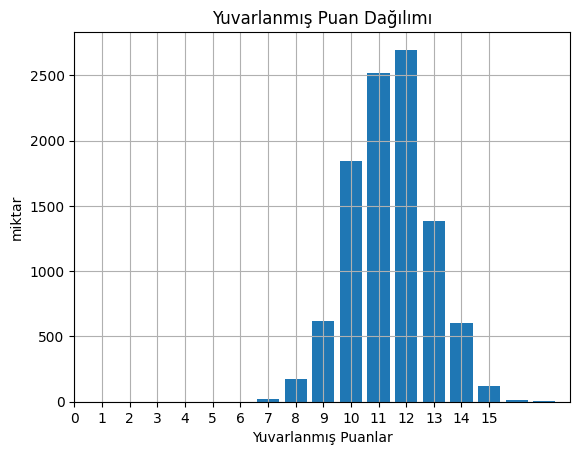

In [145]:
import numpy as np
import matplotlib.pyplot as plt

# 0 ile 15.25 arasındaki değerleri yuvarlayarak yeni bir sütun oluşturun
cevaplardf['Yuvarlanmış_Puan'] = np.round(cevaplardf['Toplam_Puan'])

# Yuvarlanmış puanların sayısını hesaplayın
yuvarlanmış_puanlar = cevaplardf['Yuvarlanmış_Puan'].value_counts()

# Grafik oluşturun
plt.bar(yuvarlanmış_puanlar.index, yuvarlanmış_puanlar.values)
plt.xlabel('Yuvarlanmış Puanlar')
plt.ylabel('miktar')
plt.title('Yuvarlanmış Puan Dağılımı')
plt.xticks(np.arange(16))
plt.grid(True)
plt.show()


In [146]:
"""
import pandas as pd

# 'Toplam_Puan' sütununu sayısal türe dönüştürelim
cevaplardf['Toplam_Puan'] = pd.to_numeric(cevaplardf['Toplam_Puan'], errors='coerce')
# Yeni bir sütun oluşturalım ve başlangıçta boş olarak tanımlayalım
cevaplardf['Label'] = ''

# Her bir satır için kategori ataması yapalım
for index, row in cevaplardf.iterrows():
    puan = row['Toplam_Puan'] # Değişken adını toplam_puan yerine puan olarak değiştirdik
    if puan > 12:  # Toplam puan 15 veya daha fazlaysa, 'B' kategorisine atayalım
        cevaplardf.at[index, 'Label'] = 'B'
    elif puan > 10:  # Toplam puan 10 veya daha fazlaysa, 'H' kategorisine atayalım
        cevaplardf.at[index, 'Label'] = 'H'
    elif puan > 7:  # Toplam puan 5 veya daha fazlaysa, 'L' kategorisine atayalım
        cevaplardf.at[index, 'Label'] = 'L'
    else:  # Geriye kalan durumlar için, 'S' kategorisine atayalım
        cevaplardf.at[index, 'Label'] = 'S'
"""

"\nimport pandas as pd\n\n# 'Toplam_Puan' sütununu sayısal türe dönüştürelim\ncevaplardf['Toplam_Puan'] = pd.to_numeric(cevaplardf['Toplam_Puan'], errors='coerce')\n# Yeni bir sütun oluşturalım ve başlangıçta boş olarak tanımlayalım\ncevaplardf['Label'] = ''\n\n# Her bir satır için kategori ataması yapalım\nfor index, row in cevaplardf.iterrows():\n    puan = row['Toplam_Puan'] # Değişken adını toplam_puan yerine puan olarak değiştirdik\n    if puan > 12:  # Toplam puan 15 veya daha fazlaysa, 'B' kategorisine atayalım\n        cevaplardf.at[index, 'Label'] = 'B'\n    elif puan > 10:  # Toplam puan 10 veya daha fazlaysa, 'H' kategorisine atayalım\n        cevaplardf.at[index, 'Label'] = 'H'\n    elif puan > 7:  # Toplam puan 5 veya daha fazlaysa, 'L' kategorisine atayalım\n        cevaplardf.at[index, 'Label'] = 'L'\n    else:  # Geriye kalan durumlar için, 'S' kategorisine atayalım\n        cevaplardf.at[index, 'Label'] = 'S'\n"

In [147]:
"""
cevaplardf.Label.value_counts()
"""

'\ncevaplardf.Label.value_counts()\n'

In [148]:
"""
import matplotlib.pyplot as plt

# Renk listesi
colors = ['orange', 'yellow', 'red', 'green']


# Kategorileri istenen sıraya göre sırala
category_counts = cevaplardf['Label'].reindex(['S', 'L', 'H', 'B'])


# Yüzdelik grafiği oluşturma
cevaplardf['Label'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=colors, shadow=True)

# Eksenleri çember şeklinde ayarlama
plt.axis('equal')

# Başlık ekleme
plt.title('Bağımlılık Dağılımı', fontsize=16)

# Etiketlerin boyutunu ve yazı tipini ayarlama
plt.ylabel('')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Grafiği gösterme
plt.show()
"""

"\nimport matplotlib.pyplot as plt\n\n# Renk listesi\ncolors = ['orange', 'yellow', 'red', 'green']\n\n\n# Kategorileri istenen sıraya göre sırala\ncategory_counts = cevaplardf['Label'].reindex(['S', 'L', 'H', 'B'])\n\n\n# Yüzdelik grafiği oluşturma\ncevaplardf['Label'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=colors, shadow=True)\n\n# Eksenleri çember şeklinde ayarlama\nplt.axis('equal')\n\n# Başlık ekleme\nplt.title('Bağımlılık Dağılımı', fontsize=16)\n\n# Etiketlerin boyutunu ve yazı tipini ayarlama\nplt.ylabel('')\nplt.xticks(fontsize=12)\nplt.yticks(fontsize=12)\n\n# Grafiği gösterme\nplt.show()\n"

In [149]:
"""
import matplotlib.pyplot as plt

# Kategorilerin yüzdeye göre dağılımını hesapla
category_counts = cevaplardf['Label'].value_counts(normalize=True) * 100

# Kategorileri istenen sıraya göre sırala
category_counts = category_counts.reindex(['S', 'L', 'H', 'B'])

# Renk listesi
colors = ['green', 'yellow', 'orange', 'red']

# Yüzdelik grafiği oluşturma
category_counts.plot(kind='bar', color=colors, edgecolor='black', alpha=0.7)

# Başlık ve eksik değerlerin düzenlenmesi
plt.title('Bağımlılık Dağılımı', fontsize=16)
plt.xlabel('Kategori', fontsize=14)
plt.ylabel('Yüzde (%)', fontsize=14)

# Yüzdelik değerlerin çubukların üzerine yazdırılması
for i, value in enumerate(category_counts):
    plt.text(i, value + 0.5, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)

# Eksenlerin ve arka planın düzenlenmesi
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Grafiği gösterme
plt.tight_layout()
plt.show()
"""

"\nimport matplotlib.pyplot as plt\n\n# Kategorilerin yüzdeye göre dağılımını hesapla\ncategory_counts = cevaplardf['Label'].value_counts(normalize=True) * 100\n\n# Kategorileri istenen sıraya göre sırala\ncategory_counts = category_counts.reindex(['S', 'L', 'H', 'B'])\n\n# Renk listesi\ncolors = ['green', 'yellow', 'orange', 'red']\n\n# Yüzdelik grafiği oluşturma\ncategory_counts.plot(kind='bar', color=colors, edgecolor='black', alpha=0.7)\n\n# Başlık ve eksik değerlerin düzenlenmesi\nplt.title('Bağımlılık Dağılımı', fontsize=16)\nplt.xlabel('Kategori', fontsize=14)\nplt.ylabel('Yüzde (%)', fontsize=14)\n\n# Yüzdelik değerlerin çubukların üzerine yazdırılması\nfor i, value in enumerate(category_counts):\n    plt.text(i, value + 0.5, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)\n\n# Eksenlerin ve arka planın düzenlenmesi\nplt.xticks(rotation=0)\nplt.grid(axis='y', linestyle='--', alpha=0.7)\n\n# Grafiği gösterme\nplt.tight_layout()\nplt.show()\n"

In [150]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Veri kümesini hazırlama
X = cevaplardf[['Toplam_Puan']].values

# KMeans modelini oluşturma
kmeans = KMeans(n_clusters=4, random_state=42)

# Modeli veri üzerine uygulama
kmeans.fit(X)

# Küme merkezlerini almak
cluster_centers = kmeans.cluster_centers_

# Her bir veri noktasının hangi küme içinde olduğunu tahmin etme
labels = kmeans.labels_

# Küme merkezlerini ve etiketlerini eşleştirmek için bir sözlük oluşturma
cluster_centers_dict = {}

for i, center in enumerate(cluster_centers):
    cluster_centers_dict[i] = center

sorted_centers = sorted(cluster_centers_dict.items(), key=lambda x: x[1])

for label, center in sorted_centers:
    print(f"Küme {label}: Merkez = {center}")

# Her bir veri noktasının kümesini yazdırma
print("Veri Noktalarının Küme Etiketleri:")
print(labels)


cluster_counts = np.bincount(labels)

# Her bir kümenin sayısını yazdırma
for i, count in enumerate(cluster_counts):
    print(f"Küme {i}: {count} veri noktası")

sorted_labels = [label for label, _ in sorted_centers]

# Her bir veri noktasını küme etiketlerine göre etiketleme
for index, label in enumerate(labels):
    if label == sorted_labels[0]:
        cevaplardf.at[index, 'Label'] = 'S'
    elif label == sorted_labels[1]:
        cevaplardf.at[index, 'Label'] = 'L'
    elif label == sorted_labels[2]:
        cevaplardf.at[index, 'Label'] = 'H'
    elif label == sorted_labels[3]:
        cevaplardf.at[index, 'Label'] = 'B'

Küme 2: Merkez = [9.25974409]
Küme 3: Merkez = [10.70207373]
Küme 0: Merkez = [11.98330925]
Küme 1: Merkez = [13.50420216]
Veri Noktalarının Küme Etiketleri:
[0 1 1 ... 3 0 0]
Küme 0: 3460 veri noktası
Küme 1: 1761 veri noktası
Küme 2: 1524 veri noktası
Küme 3: 3255 veri noktası


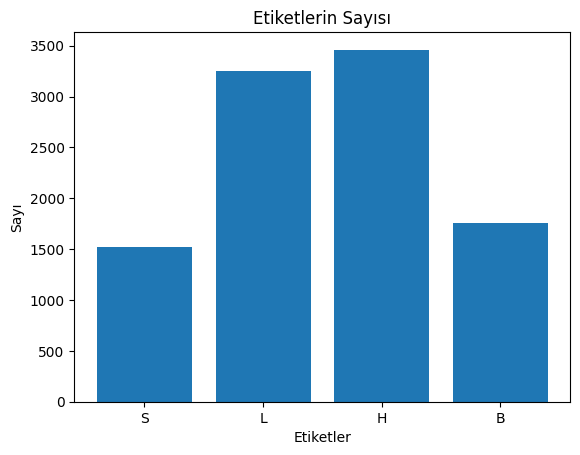

In [151]:
import matplotlib.pyplot as plt

# Etiketlerin sayısını hesapla ve sırala
label_counts = cevaplardf['Label'].value_counts()[['S', 'L', 'H', 'B']]

# Tabloyu çiz
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Etiketler')
plt.ylabel('Sayı')
plt.title('Etiketlerin Sayısı')
plt.show()


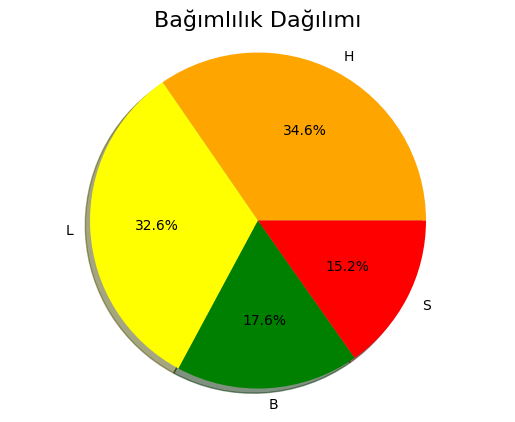

In [152]:
import matplotlib.pyplot as plt

# Renk listesi
colors = ['orange', 'yellow',  'green','red']



category_counts = cevaplardf['Label'].reindex(['S', 'L', 'H', 'B'])


# Yüzdelik grafiği oluşturma
cevaplardf['Label'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=colors, shadow=True)

# Eksenleri çember şeklinde ayarlama
plt.axis('equal')

# Başlık ekleme
plt.title('Bağımlılık Dağılımı', fontsize=16)

# Etiketlerin boyutunu ve yazı tipini ayarlama
plt.ylabel('')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Grafiği gösterme
plt.show()


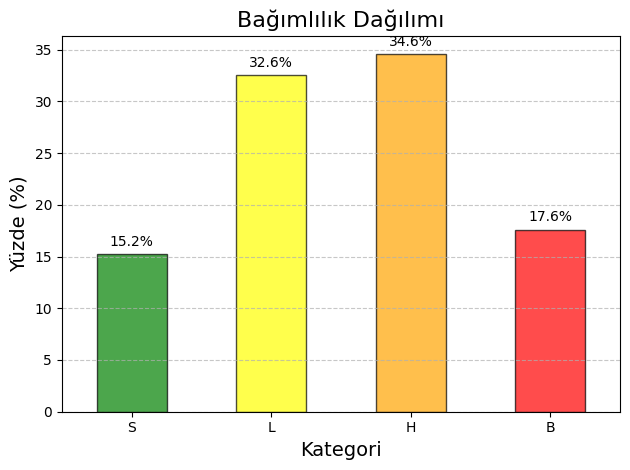

In [153]:
import matplotlib.pyplot as plt

# Kategorilerin yüzdeye göre dağılımını hesapla
category_counts = cevaplardf['Label'].value_counts(normalize=True) * 100

# Kategorileri istenen sıraya göre sırala
category_counts = category_counts.reindex(['S', 'L', 'H', 'B'])

# Renk listesi
colors = ['green', 'yellow', 'orange', 'red']

# Yüzdelik grafiği oluşturma
category_counts.plot(kind='bar', color=colors, edgecolor='black', alpha=0.7)

# Başlık ve eksik değerlerin düzenlenmesi
plt.title('Bağımlılık Dağılımı', fontsize=16)
plt.xlabel('Kategori', fontsize=14)
plt.ylabel('Yüzde (%)', fontsize=14)

# Yüzdelik değerlerin çubukların üzerine yazdırılması
for i, value in enumerate(category_counts):
    plt.text(i, value + 0.5, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)

# Eksenlerin ve arka planın düzenlenmesi
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Grafiği gösterme
plt.tight_layout()
plt.show()

In [154]:

# Etiketlere göre verileri filtreleyip oranlarını hesaplama
s_ratio = cevaplardf['Label'].value_counts(normalize=True)['S']
h_ratio = cevaplardf['Label'].value_counts(normalize=True)['H']
l_ratio = cevaplardf['Label'].value_counts(normalize=True)['L']
b_ratio = cevaplardf['Label'].value_counts(normalize=True)['B']

# Oranları bir değişkene aktarma
verilen_gecis_oranlari = {'S': s_ratio, 'H': h_ratio, 'L': l_ratio, 'B': b_ratio}

print(verilen_gecis_oranlari)

{'S': 0.1524, 'H': 0.346, 'L': 0.3255, 'B': 0.1761}


In [155]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder oluştur
label_encoder = LabelEncoder()

# 'type' sütununu sayısallaştır
cevaplardf['Label'] = label_encoder.fit_transform(cevaplardf['Label'])

# Sınıfların hangi sayısal değere karşılık geldiğini kontrol et
class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Class Mapping:")
print(class_mapping)

dataframe_selected=cevaplardf

Class Mapping:
{'B': 0, 'H': 1, 'L': 2, 'S': 3}


In [156]:
cevaplardf.head(20)#217


,Q1_Points,Q2_Points,Q3_Points,Q4_Points,Q5_Points,Q6_Points,Q7_Points,Q8_Points,Q9_Points,Q10_Points,...,Q14_Points,Q15_Points,Q16_Points,Q17_Points,Q18_Points,Q19_Points,Q20_Points,Toplam_Puan,Yuvarlanmış_Puan,Label
0,0.2,1.0,0.25,0.6,0.00,0.50,0.00,0.00,0.00,0.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,12.55,13.0,1
1,0.4,0.8,0.50,0.6,0.75,0.00,0.50,0.75,0.75,0.50,...,1.00,0.75,0.50,0.75,0.50,1.00,0.75,13.05,13.0,0
2,0.7,0.8,0.50,0.6,0.25,0.50,0.00,0.25,0.25,0.75,...,1.00,1.00,0.75,0.50,0.75,1.00,1.00,13.10,13.0,0
3,0.5,0.9,0.75,0.2,0.25,0.00,0.50,0.50,0.25,0.25,...,0.75,1.00,1.00,0.75,0.25,1.00,1.00,12.10,12.0,1
4,0.5,1.0,0.25,0.4,0.50,0.50,0.75,0.75,0.25,0.50,...,0.75,0.50,0.75,0.75,0.50,0.75,0.75,12.40,12.0,1
5,0.2,1.0,0.25,0.6,0.25,0.00,0.00,0.25,0.00,0.75,...,1.00,0.25,0.50,0.75,0.25,0.75,1.00,10.30,10.0,2
6,0.4,1.0,0.25,0.6,0.00,0.50,0.00,0.75,0.50,0.50,...,1.00,0.75,0.75,0.75,0.25,1.00,0.75,12.00,12.0,1
7,0.1,1.0,0.00,0.0,0.25,0.25,0.25,0.25,0.00,0.25,...,0.75,1.00,1.00,0.75,0.50,1.00,1.00,10.35,10.0,2
8,0.2,0.6,1.00,0.0,0.00,0.25,0.75,0.50,0.75,0.25,...,0.75,0.50,0.50,0.75,0.50,0.75,0.75,10.80,11.0,2
9,0.4,1.0,0.75,0.6,0.50,0.50,0.50,0.50,0.50,0.25,...,0.75,0.75,0.75,0.50,0.50,1.00,0.75,13.00,13.0,0


In [157]:


# Geçiş hızlarını hesapla
alpha = verilen_gecis_oranlari['S']/verilen_gecis_oranlari['L']  # S'den L'ye geçiş hızı
beta = verilen_gecis_oranlari['L']/verilen_gecis_oranlari['H'] # L'den H'ye geçiş hızı
gamma = verilen_gecis_oranlari['H']/verilen_gecis_oranlari['L']  # H'den L'ye geçiş hızı
delta = verilen_gecis_oranlari['H']/verilen_gecis_oranlari['B']  # H'den B'ye geçiş hızı
epsilon = verilen_gecis_oranlari['B']/verilen_gecis_oranlari['L']  # B'den L'ye geçiş hızı


# Geçiş hızlarını hesapla
k = verilen_gecis_oranlari['S'] * verilen_gecis_oranlari['L']  # S ve L'den L'ye geçiş hızı
q = verilen_gecis_oranlari['S'] * verilen_gecis_oranlari['H']  # S ve H'den L'ye geçiş hızı
c = verilen_gecis_oranlari['L'] * verilen_gecis_oranlari['H']  # L ve H'den H'ye geçiş hızı
p = verilen_gecis_oranlari['H'] * verilen_gecis_oranlari['B']  # H ve H'den B'ye geçiş hızı


# Sonuçları yazdır
print("S'den L'ye geçiş hızı (alpha):", alpha)
print("L'den H'ye geçiş hızı (beta):", beta)
print("H'den L'ye geçiş hızı (gamma):", gamma)
print("H'den B'ye geçiş hızı(delta):", delta)
print("B'den L'ye geçiş hızı(epsilon):", epsilon)
print("S ve L'den L'ye geçiş hızı (k):", k)
print("S ve H'den L'ye geçiş hızı (q):", q)
print("L ve H'den H'ye geçiş hızı (c):", c)
print("H ve H'den B'ye geçiş hızı (p):", p)




S'den L'ye geçiş hızı (alpha): 0.4682027649769585
L'den H'ye geçiş hızı (beta): 0.9407514450867053
H'den L'ye geçiş hızı (gamma): 1.0629800307219661
H'den B'ye geçiş hızı(delta): 1.964792731402612
B'den L'ye geçiş hızı(epsilon): 0.5410138248847927
S ve L'den L'ye geçiş hızı (k): 0.0496062
S ve H'den L'ye geçiş hızı (q): 0.0527304
L ve H'den H'ye geçiş hızı (c): 0.112623
H ve H'den B'ye geçiş hızı (p): 0.060930599999999994


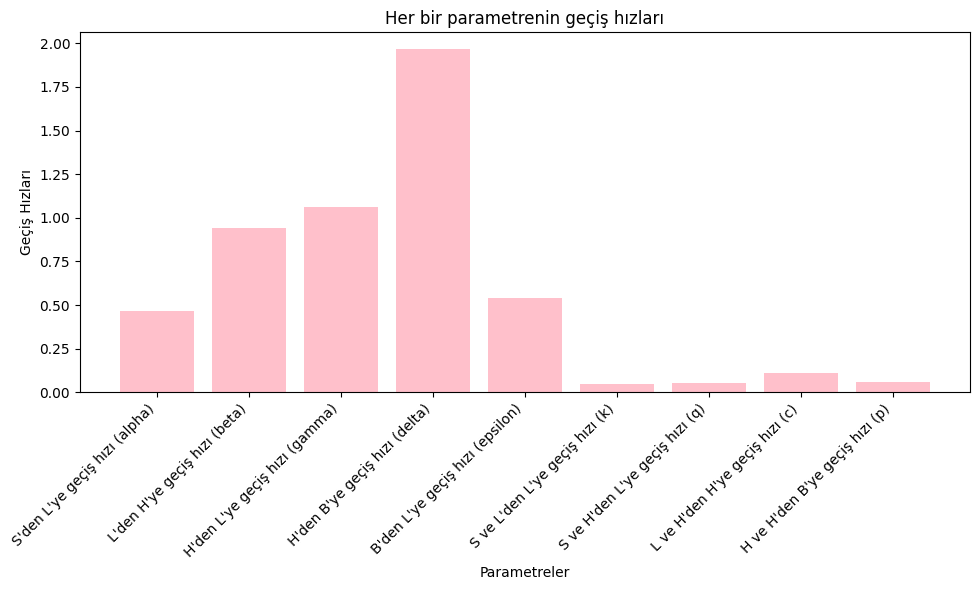

In [158]:
import matplotlib.pyplot as plt


# Geçiş hızları
gecis_hizlari = {
    'S\'den L\'ye geçiş hızı (alpha)': alpha,
    'L\'den H\'ye geçiş hızı (beta)': beta,
    'H\'den L\'ye geçiş hızı (gamma)': gamma,
    'H\'den B\'ye geçiş hızı (delta)': delta,
    'B\'den L\'ye geçiş hızı (epsilon)': epsilon,
    'S ve L\'den L\'ye geçiş hızı (k)': k,
    'S ve H\'den L\'ye geçiş hızı (q)': q,
    'L ve H\'den H\'ye geçiş hızı (c)': c,
    'H ve H\'den B\'ye geçiş hızı (p)': p
}

# Parametre etiketleri
etiketler = list(gecis_hizlari.keys())

# Parametre değerleri
degerler = list(gecis_hizlari.values())

# Grafiği oluştur
plt.figure(figsize=(10, 6))
plt.bar(etiketler, degerler, color='pink')
plt.xlabel('Parametreler')
plt.ylabel('Geçiş Hızları')
plt.title('Her bir parametrenin geçiş hızları')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

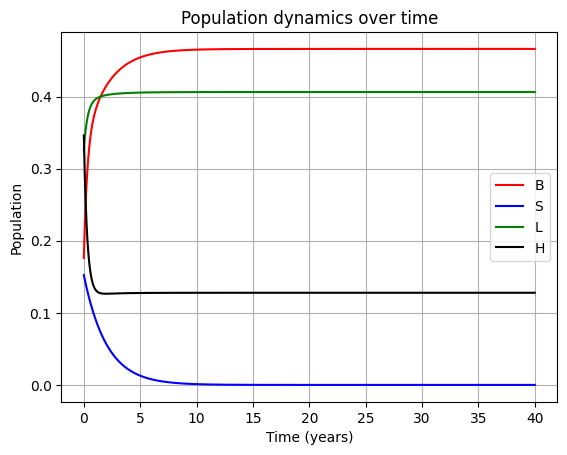

In [159]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the system of differential equations
def ode_technological(y, t, alpha, beta, gamma, delta, epsilon, p):
    S, L, H, B = y

    auxS = -alpha*S - k*S*L - q*S*H
    auxL = alpha*S + k*S*L + q*S*H - beta*L - c*L*H + gamma*H + epsilon*B
    auxH = beta*L + c*L*H - gamma*H - delta*H - p*H**2
    auxB = delta*H + p*H**2 - epsilon*B

    return [auxS, auxL, auxH, auxB]

# Initial conditions
S0 = s_ratio # Initial value for S
L0 = l_ratio # Initial value for L
H0 =  h_ratio  # Initial value for H
B0 = b_ratio  # Initial value for B


# Combine initial conditions into a vector
initialConditions = [S0, L0, H0, B0]

# Define the time span
T = 40
tspan = np.linspace(0, T, 1000)

# Solve the system of differential equations
solution = odeint(ode_technological, initialConditions, tspan, args=(alpha, beta, gamma, delta, epsilon, p))

# Extract the solution components
S = solution[:, 0]
L = solution[:, 1]
H = solution[:, 2]
B = solution[:, 3]


# Plot the results
plt.figure()
plt.plot(tspan, B, 'r', label='B')
plt.plot(tspan, S, 'b', label='S')
plt.plot(tspan, L, 'g', label='L')
plt.plot(tspan, H, 'k', label='H')
plt.legend()
plt.xlabel('Time (years)')
plt.ylabel('Population')
plt.title('Population dynamics over time')
plt.grid(True)
plt.show()

In [160]:
X = dataframe_selected.drop(["Label","Yuvarlanmış_Puan","Toplam_Puan"], axis=1).values
y = dataframe_selected["Label"].values

In [161]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42,test_size=0.10)

print(f"traine ayrılan {len(X_train)}")
print(f"teste ayrılan {len(X_test)}")

traine ayrılan 9000
teste ayrılan 1000


In [162]:
X_train.shape

(9000, 20)

In [163]:
y_train.shape

(9000,)

In [164]:
import joblib
# Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
logreg_pred = logreg_model.predict(X_test)
joblib.dump(logreg_model, 'Sosyal_estimation_model.pkl')


c:\Users\Alperen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['Sosyal_estimation_model.pkl']

In [165]:
# Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

In [166]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision_weighted = precision_score(y_true, y_pred, average='weighted')
    recall_weighted = recall_score(y_true, y_pred, average='weighted')
    f1_weighted = f1_score(y_true, y_pred, average='weighted')
    
    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    print(f"{model_name} Model:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision (Weighted): {precision_weighted}")
    print(f"Recall (Weighted): {recall_weighted}")
    print(f"F1 Score (Weighted): {f1_weighted}")
    print("Confusion Matrix:")
    print(cm)
    print("\n")
    
    # Çok sınıflı ROC AUC hesaplama
    n_classes = len(np.unique(y_true))
    if n_classes > 2:
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_true == i, y_pred == i)
            roc_auc[i] = auc(fpr[i], tpr[i])
        
        # Ortalama ROC AUC hesaplama
        macro_roc_auc = np.mean(list(roc_auc.values()))
        print(f"ROC AUC (Macro): {macro_roc_auc}")
        
        # ROC eğrisini çizme
        plt.figure()
        for i in range(n_classes):
            plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:0.2f})')
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc="lower right")
        plt.show()
    else:
        # İkili sınıflandırma için ROC AUC hesaplama
        roc_auc = roc_auc_score(y_true, y_pred)
        print(f"ROC AUC: {roc_auc}")


Logistic Regression Model:
Accuracy: 0.979
Precision (Weighted): 0.9795105197653055
Recall (Weighted): 0.979
F1 Score (Weighted): 0.9789902238829832
Confusion Matrix:
[[153   5   0   0]
 [  0 322   5   0]
 [  0   2 345   0]
 [  0   0   9 159]]


ROC AUC (Macro): 0.9827360118135621


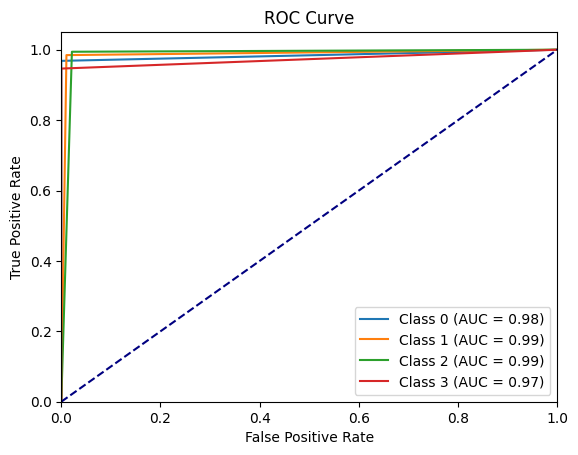

Support Vector Machine Model:
Accuracy: 0.938
Precision (Weighted): 0.938672044599321
Recall (Weighted): 0.938
F1 Score (Weighted): 0.9380340597456314
Confusion Matrix:
[[143  15   0   0]
 [  4 310  13   0]
 [  0  12 328   7]
 [  0   0  11 157]]


ROC AUC (Macro): 0.9553509897656232


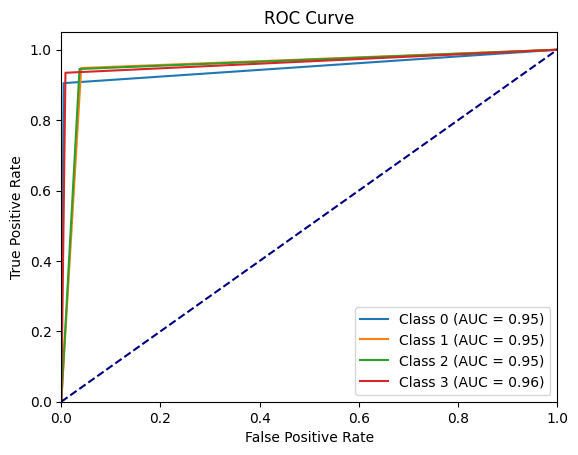

In [167]:
evaluate_model(y_test, logreg_pred, "Logistic Regression")
evaluate_model(y_test, svm_pred, "Support Vector Machine")

In [168]:
class_names = ['B','H','L', 'S']


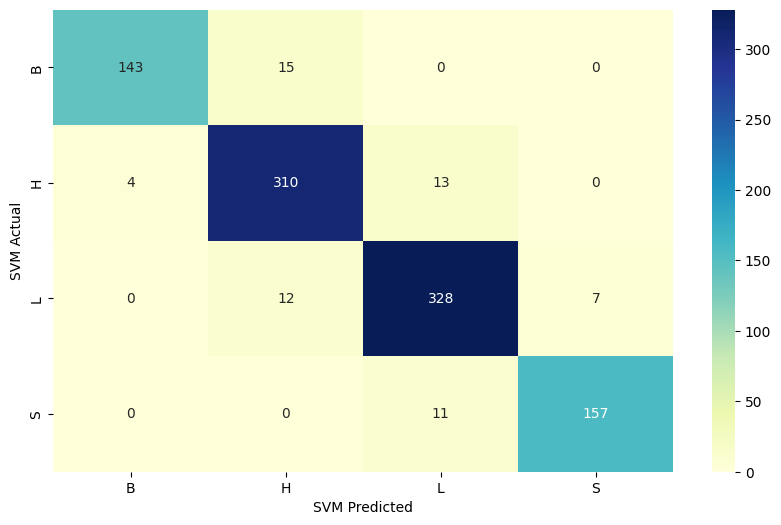

In [169]:
cm = confusion_matrix(y_test, svm_pred)

cm_df = pd.DataFrame(cm, columns=class_names, index=class_names)

plt.figure(figsize=(10, 6))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel('SVM Predicted')
plt.ylabel('SVM Actual')
plt.show()

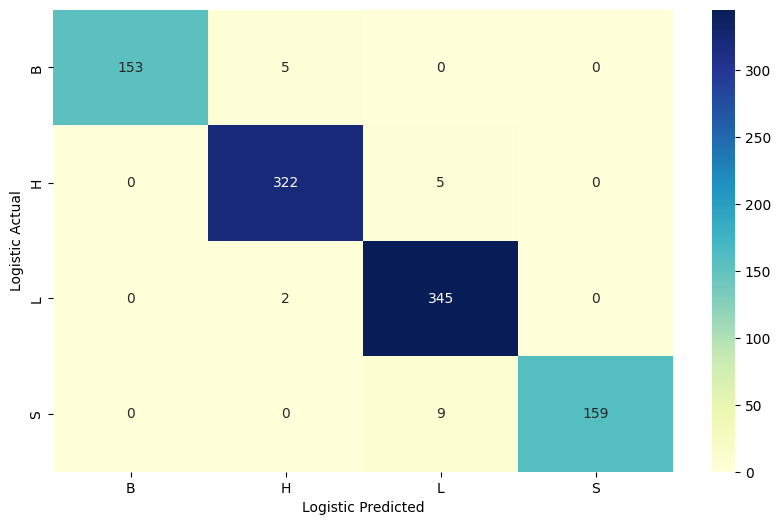

In [170]:
cm = confusion_matrix(y_test, logreg_pred)

cm_df = pd.DataFrame(cm, columns=class_names, index=class_names)

plt.figure(figsize=(10, 6))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel('Logistic Predicted')
plt.ylabel('Logistic Actual')
plt.show()